In [2]:
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as shc

In [10]:
def Basketball(year):
    url = "https://www.basketball-reference.com/leagues/NBA_" + str(year) + "_per_game.html"
    html = pd.read_html(url, header = 0)
    df = html[0]
    raw = df.drop(df[df.Age == 'Age'].index) # Deletes repeating headers in content
    raw = raw.fillna(0)
    df = raw.drop(['Rk'], axis=1)
    df = df.loc[df['Pos'] != 'Pos']
    cols = ['Age', 'G', 'GS','MP', 'FG','FGA', 'FG%', '3P', '3PA','3P%','2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 
            'FT%','ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
    percent = ['FG%','2P%','eFG%', 'FT%','3P%']
    df[percent] = df[percent]*100
    df['FG%'] = df.groupby(['Pos'])['FG%'].apply(lambda x: x.fillna(x.median()))
    df['3P%'] = df.groupby(['Pos'])['3P%'].apply(lambda x: x.fillna(x.median()))
    df['FT%'] = df.groupby(['Pos'])['FT%'].apply(lambda x: x.fillna(x.median()))
    df['2P%'] = df.groupby(['Pos'])['2P%'].apply(lambda x: x.fillna(x.median()))
    df['eFG%'] = df.groupby(['Pos'])['2P%'].apply(lambda x: x.fillna(x.median()))
    df = df.loc[df['Pos'] != 'Pos']
    df = df.drop_duplicates(subset=['Player'])
    return df
#data = Basketball(2023)

/var/folders/11/hdsj36ms0pj75xm019ps_gb80000gn/T/ipykernel_2321/1180356135.py:14: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['FG%'] = df.groupby(['Pos'])['FG%'].apply(lambda x: x.fillna(x.median()))
/var/folders/11/hdsj36ms0pj75xm019ps_gb80000gn/T/ipykernel_2321/1180356135.py:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	

In [30]:
df = pd.read_csv('mvpall.csv',sep=';')
df = df.loc[df['Pos'] != 'Pos']
df = df.drop(['Rk'], axis=1)
cols = ['Age', 'G', 'GS','MP', 'FG','FGA', 'FG%', '3P', '3PA','3P%','2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 
            'FT%','ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
percent = ['FG%','2P%','eFG%', 'FT%','3P%']
df[percent] = df[percent]/10
df['FG%'] = df.groupby(['Pos'])['FG%'].apply(lambda x: x.fillna(x.median()))
df['3P%'] = df.groupby(['Pos'])['3P%'].apply(lambda x: x.fillna(x.median()))
df['FT%'] = df.groupby(['Pos'])['FT%'].apply(lambda x: x.fillna(x.median()))
df['2P%'] = df.groupby(['Pos'])['2P%'].apply(lambda x: x.fillna(x.median()))
df['eFG%'] = df.groupby(['Pos'])['2P%'].apply(lambda x: x.fillna(x.median()))
df = df.loc[df['Pos'] != 'Pos']
df = df.drop_duplicates(subset=['Player'])
df

/var/folders/11/hdsj36ms0pj75xm019ps_gb80000gn/T/ipykernel_2321/3942801588.py:9: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)

/var/folders/11/hdsj36ms0pj75xm019ps_gb80000gn/T/ipykernel_2321/3942801588.py:10: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)

/var/folders/11/hdsj36ms0pj75xm019ps_gb80

Player Pos   Age   Tm     G    GS    MP   FG   FGA   FG%  \
0      Precious Achiuwa   C  23.0  TOR  28.0   4.0  22.0  3.9   8.1  47.8   
1          Steven Adams   C  29.0  MEM  42.0  42.0  27.0  3.7   6.3  59.7   
2           Bam Adebayo   C  25.0  MIA  46.0  46.0  35.0  8.6  16.0  54.0   
3          Ochai Agbaji  SG  22.0  UTA  29.0   0.0  12.9  1.5   3.1  47.8   
4          Santi Aldama  PF  22.0  MEM  47.0  16.0  21.8  3.2   6.7  47.9   
..                  ...  ..   ...  ...   ...   ...   ...  ...   ...   ...   
527        Delon Wright  PG  30.0  WAS  21.0   1.0  21.2  2.3   5.3  44.1   
528  McKinley Wright IV  PG  24.0  DAL  15.0   0.0   9.0  0.7   1.6  41.7   
529      Thaddeus Young  PF  34.0  TOR  41.0   9.0  16.0  2.2   3.9  56.3   
530          Trae Young  PG  24.0  ATL  45.0  45.0  35.7  8.6  20.1  42.7   
531         Ivica Zubac   C  25.0  LAC  51.0  51.0  29.2  4.0   6.5  61.0   

     ...   FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0    ...  74.3  2.0  4.4   6.4  1.0  0.6  0.7  1.2  1.9  10.2  
1    ...  36.4  5.1  6.5  11.5  2.3  0.9  1.1  1.9  2.3   8.6  
2    ...  79.1  2.8  7.2  10.0  3.2  1.2  0.8  2.7  2.9  21.4  
3    ...  62.5  0.6  1.0   1.6  0.5  0.1  0.1  0.3  1.3   3.9  
4    ...  71.1  1.1  3.5   4.6  1.2  0.7  0.7  0.7  2.0   9.1  
..   ...   ...  ...  ...   ...  ...  ...  ...  ...  ...   ...  
527  ...  88.9  0.9  2.0   3.0  3.6  2.0  0.3  0.8  1.2   6.6  
528  ...  62.5  0.3  0.8   1.1  1.3  0.5  0.2  0.6  1.0   1.7  
529  ...  75.0  1.5  1.9   3.4  1.5  1.1  0.1  0.8  1.8   4.9  
530  ...  88.6  0.7  2.2   2.9  9.9  0.9  0.1  4.1  1.5  27.2  
531  ...  71.2  3.4  6.8  10.1  1.0  0.4  1.3  1.8  3.0  10.1  

[498 rows x 29 columns]

In [31]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [20]:
df2 = pd.get_dummies(df, columns = ['Pos'])
print(df2)

                 Player   Age   Tm     G    GS    MP   FG   FGA   FG%   3P  \
0      Precious Achiuwa  23.0  TOR  28.0   4.0  22.0  3.9   8.1  47.8  0.5   
1          Steven Adams  29.0  MEM  42.0  42.0  27.0  3.7   6.3  59.7  0.0   
2           Bam Adebayo  25.0  MIA  46.0  46.0  35.0  8.6  16.0  54.0  0.0   
3          Ochai Agbaji  22.0  UTA  29.0   0.0  12.9  1.5   3.1  47.8  0.6   
4          Santi Aldama  22.0  MEM  47.0  16.0  21.8  3.2   6.7  47.9  1.3   
..                  ...   ...  ...   ...   ...   ...  ...   ...   ...  ...   
527        Delon Wright  30.0  WAS  21.0   1.0  21.2  2.3   5.3  44.1  0.8   
528  McKinley Wright IV  24.0  DAL  15.0   0.0   9.0  0.7   1.6  41.7  0.1   
529      Thaddeus Young  34.0  TOR  41.0   9.0  16.0  2.2   3.9  56.3  0.1   
530          Trae Young  24.0  ATL  45.0  45.0  35.7  8.6  20.1  42.7  2.1   
531         Ivica Zubac  25.0  LAC  51.0  51.0  29.2  4.0   6.5  61.0  0.0   

     ...  STL  BLK  TOV   PF   PTS  Pos_C  Pos_PF  Pos_PG  Pos_

In [21]:
df_percent = df2.copy()
df_no_percent = df2.copy()

df_percent =df2.drop(['Player','Tm', 'Age','2P','3P','FT','FG','2PA','3PA','FTA','FGA','G','GS'],axis=1)
df_no_percent =df2.drop(['Player','Tm', 'Age','2P%','3P%','FT%','FG%','G','GS'],axis=1)

scaler1 = StandardScaler().fit(df_percent).transform(df_percent)
scaler2 = StandardScaler().fit(df_no_percent).transform(df_no_percent)

tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(df_percent)
tsne2 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(df_no_percent)

/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow curve')

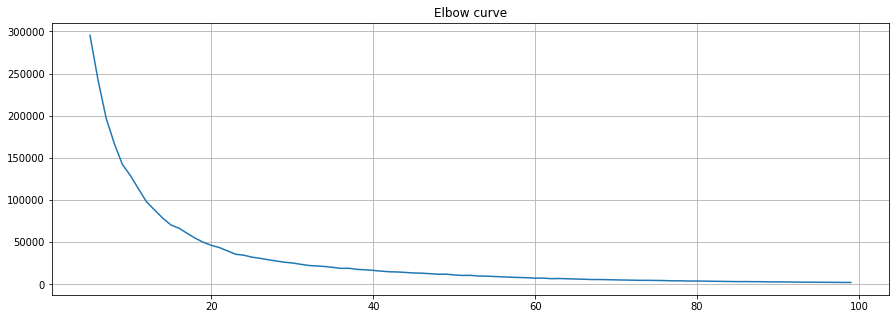

In [5]:
vals = []
for k in range(5, 100):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tsne)
    vals.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(5, 100), vals)
plt.grid(True)
plt.title('Elbow curve')

/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

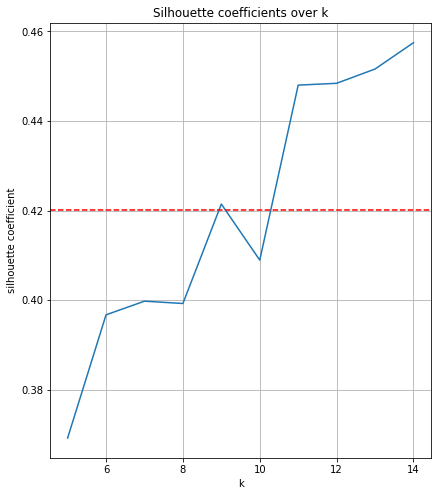

In [6]:
silhouette_plot = []
for k in range(5, 15):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(tsne)
    silhouette_avg =silhouette_score(tsne, cluster_labels)
    silhouette_plot.append(silhouette_avg)
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(5, 15), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

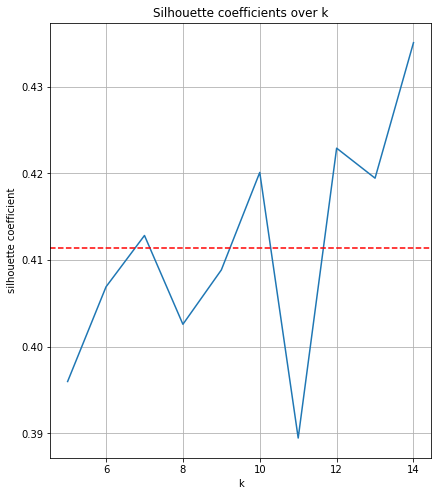

In [7]:
silhouette_plot2 = []
for k in range(5, 15):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(tsne2)
    silhouette_avg =silhouette_score(tsne2, cluster_labels)
    silhouette_plot2.append(silhouette_avg)
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(5, 15), silhouette_plot2)
plt.axhline(y=np.mean(silhouette_plot2), color="red", linestyle="--")
plt.grid(True)

In [8]:
silhouette_plot2

[0.39597803,
 0.40691483,
 0.41283768,
 0.4025857,
 0.40886092,
 0.4201181,
 0.3894529,
 0.42291945,
 0.41945404,
 0.43509635]

In [14]:
km1= KMeans(n_clusters=9, random_state=42).fit(tsne)
km11= KMeans(n_clusters=8, random_state=42).fit(tsne)
km2= KMeans(n_clusters=9, random_state=42).fit(tsne2)

cluster1 = km1.labels_
cluster11 = km11.labels_
cluster2 = km2.labels_

centroids1 = km1.cluster_centers_
centroids11 = km11.cluster_centers_
centroids2 = km2.cluster_centers_

score1 = silhouette_score(tsne, km1.labels_, metric='euclidean') #percent
score11 = silhouette_score(tsne, km11.labels_, metric='euclidean') #percent
score2 = silhouette_score(tsne2, km2.labels_, metric='euclidean') #no percent

print(score1,score11,score2)

0.409237 0.41211477 0.416907


/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
df_percent['Cluster'] = cluster1
#df_percent['Cluster2'] = cluster11
#df_no_percent['Cluster'] = cluster2

df_percent['Player'] = df['Player']
#df_no_percent['Player'] = data['Player']

In [29]:
import pickle
pickle.dump(km1, open('modelo.pkl', 'wb'))

### K=9

In [23]:
px.scatter(df_percent, x='PTS', y='TRB',color='Cluster',hover_data=['Player'])

In [24]:
px.scatter(df_percent, x='PTS', y='AST',color='Cluster',hover_data=['Player'])

In [25]:
px.scatter(df_percent, x='PTS', y='eFG%',color='Cluster',hover_data=['Player'])

In [72]:
cluster_a = df_percent.loc[df_percent['Cluster'] == 8].sort_values(['PTS','AST','TRB'], ascending=[False, False,False])
cluster_a[['Player','MP','PTS','AST','TRB','BLK','STL','eFG%','FG%','3P%','2P%','Cluster']].head(30)

Player    MP   PTS   AST   TRB  BLK  STL  eFG%   FG%  \
138              Joel Embiid  34.8  33.6   4.2  10.0  1.7  1.1  56.7  53.4   
120              Luka Dončić  36.8  33.4   8.3   8.9  0.5  1.5  58.1  50.1   
10     Giannis Antetokounmpo  33.4  31.7   5.3  12.0  0.8  0.8  57.8  53.4   
463             Jayson Tatum  37.5  31.1   4.4   8.7  0.8  1.1  55.0  46.5   
160  Shai Gilgeous-Alexander  35.6  30.9   5.7   4.8  1.1  1.7  53.2  51.0   
290           Damian Lillard  35.9  30.4   7.3   3.9  0.3  0.9  57.7  46.3   
234             LeBron James  36.3  30.2   7.1   8.5  0.6  1.0  59.3  50.7   
103            Stephen Curry  34.6  29.7   6.5   6.3  0.4  1.0  58.6  49.4   
132             Kevin Durant  36.0  29.7   5.3   6.7  1.5  0.8  62.2  55.9   
334         Donovan Mitchell  35.8  27.9   4.8   3.9  0.4  1.5  55.7  48.2   
226             Kyrie Irving  37.1  27.3   5.3   5.1  0.8  1.1  56.5  48.6   
64              Jaylen Brown  36.0  27.0   3.2   7.2  0.5  1.1  58.4  49.1   
106            Anthony Davis  33.2  26.7   2.6  12.0  2.1  1.3  60.9  58.4   
112            DeMar DeRozan  36.2  26.4   5.0   4.9  0.5  1.0  52.9  51.3   
523          Zion Williamson  33.0  26.0   4.6   7.0  0.6  1.1  61.8  60.8   
244             Nikola Jokić  33.5  25.1   9.9  10.9  0.6  1.4  67.3  62.9   
306          Lauri Markkanen  34.3  24.9   1.8   8.6  0.6  0.6  59.0  52.0   
149             De'Aaron Fox  33.6  24.1   6.1   4.3  0.3  1.0  56.9  50.4   
35              Bradley Beal  32.8  22.0   5.2   3.5  0.6  0.8  56.6  51.2   
73              Jimmy Butler  33.9  21.9   4.9   6.1  0.3  2.1  56.0  52.6   
2                Bam Adebayo  35.0  21.4   3.2  10.0  0.8  1.2  54.6  54.0   
47          Bojan Bogdanović  31.6  21.4   2.7   3.7  0.1  0.6  53.5  48.7   
287            Kawhi Leonard  31.3  21.3   3.9   6.2  0.4  1.2  57.7  51.4   
476       Karl-Anthony Towns  33.8  20.8   5.3   8.2  0.7  0.8  61.8  50.5   
182        Tyrese Haliburton  33.4  20.2  10.2   4.0  0.4  1.8  55.8  48.0   
488             Franz Wagner  33.1  19.9   3.5   4.0  0.2  0.9  54.4  49.1   
210             Jrue Holiday  32.7  19.5   7.3   5.1  0.4  1.3  52.8  46.7   
431         Domantas Sabonis  34.5  18.5   7.1  12.4  0.5  0.7  63.8  61.0   
526           Christian Wood  29.0  18.4   1.7   8.4  1.3  0.5  62.3  53.5   
16             Deandre Ayton  29.9  17.8   2.1  10.1  0.7  0.5  58.1  57.0   

      3P%   2P%  Cluster  
138  35.8  56.7        8  
120  35.5  58.1        8  
10   27.4  57.8        8  
463  35.0  55.0        8  
160  36.8  53.2        8  
290  37.1  57.7        8  
234  31.2  59.3        8  
103  42.7  58.6        8  
132  37.6  62.2        8  
334  39.6  55.7        8  
226  37.8  56.5        8  
64   32.8  58.4        8  
106  29.7  60.9        8  
112  32.4  52.9        8  
523  36.8  61.8        8  
244  39.0  67.3        8  
306  43.2  59.0        8  
149  32.9  56.9        8  
35   36.2  56.6        8  
73   30.3  56.0        8  
2    10.0  54.6        8  
47   41.6  53.5        8  
287  35.3  57.7        8  
476  32.5  61.8        8  
182  39.9  55.8        8  
488  37.3  54.4        8  
210  37.1  52.8        8  
431  36.4  63.8        8  
526  38.5  62.3        8  
16   30.4  58.1        8

/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



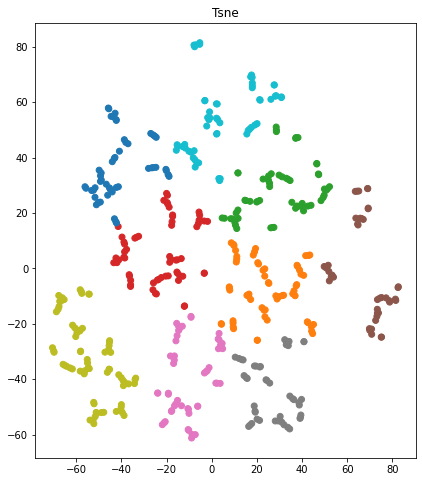

In [26]:
km_neat = KMeans(n_clusters=9, random_state=42).fit_predict(tsne)
cmap = 'tab10'
plt.figure(figsize=(15,8))
plt.subplot(121, title='Tsne')
plt.scatter(tsne[:,0], tsne[:,1], c=km_neat, cmap=cmap)

In [ ]:
def SimilarPlayer(player_name):
  player = df_percent.loc[df_percent['Player'] == player_name]
  cluster_num = player['Cluster'].max()
  options = df_percent.loc[df_percent['Cluster'] == cluster_num].sort_values(['PTS','AST','TRB'], ascending=[False, False,False])
  popcol = options.pop('Player')
  options.insert(0, 'Player',popcol)
  options['Pos'] = df['Pos']
  options['Team']=df['Tm']
  options.set_index('Player')
  return options[['Player','Pos','Team','MP','PTS','AST','TRB','BLK','STL','eFG%','FG%','3P%','2P%','Cluster']]
SimilarPlayer('John Wall')

Agrupametno Hierárquico

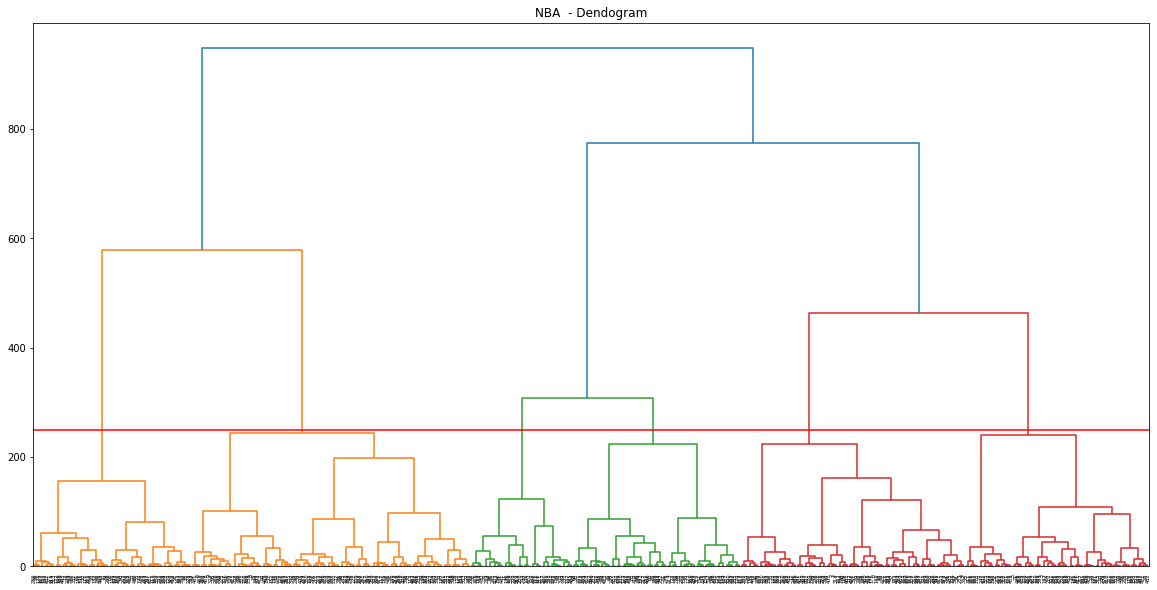

In [27]:
plt.figure(figsize=(20, 10))
plt.title("NBA  - Dendogram")
clusters = shc.linkage(tsne, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 250, color = 'r', linestyle = '-')
#16

In [78]:
def Basketball(year):
    url = "https://www.basketball-reference.com/leagues/NBA_" + str(year) + "_per_game.html"
    html = pd.read_html(url, header = 0)
    df = html[0]
    raw = df.drop(df[df.Age == 'Age'].index) # Deletes repeating headers in content
    raw = raw.fillna(0)
    df = raw.drop(['Rk'], axis=1)
    df = df.loc[df['Pos'] != 'Pos']
    df = df.loc[df['eFG%'] != 100]
    cols = ['Age', 'G', 'GS','MP', 'FG','FGA', 'FG%', '3P', '3PA','3P%','2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 
            'FT%','ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
    percent = ['FG%','2P%','eFG%', 'FT%','3P%']
    df[percent] = df[percent]*100
    dataset["Player"].str.replace("*","", regex=False)
    df['FG%'] = df.groupby(['Pos'])['FG%'].apply(lambda x: x.fillna(x.median()))
    df['3P%'] = df.groupby(['Pos'])['3P%'].apply(lambda x: x.fillna(x.median()))
    df['FT%'] = df.groupby(['Pos'])['FT%'].apply(lambda x: x.fillna(x.median()))
    df['2P%'] = df.groupby(['Pos'])['2P%'].apply(lambda x: x.fillna(x.median()))
    df['eFG%'] = df.groupby(['Pos'])['2P%'].apply(lambda x: x.fillna(x.median()))
    df = df.loc[df['Pos'] != 'Pos']
    df = df.drop_duplicates(subset=['Player'])
    return df

In [79]:
years = []
for year in range(1980, 2023):
    years.append(year)

In [80]:
dataset = []
for year in years:
    data = Basketball(year)
    data['Year'] = year
    dataset.append(data)
dataset = pd.concat(dataset)

HTTPError: HTTP Error 429: Too Many Requests

In [73]:
dataset

[                   Player Pos   Age   Tm     G    GS    MP    FG   FGA   FG%  \
 0    Kareem Abdul-Jabbar*   C  32.0  LAL  82.0   0.0  38.3  10.2  16.9  60.4   
 1           Tom Abernethy  PF  25.0  GSW  67.0   0.0  18.2   2.3   4.7  48.1   
 2             Alvan Adams   C  25.0  PHO  75.0   0.0  28.9   6.2  11.7  53.1   
 3         Tiny Archibald*  PG  31.0  BOS  80.0  80.0  35.8   4.8   9.9  48.2   
 4           Dennis Awtrey   C  31.0  CHI  26.0   0.0  21.5   1.0   2.3  45.0   
 ..                    ...  ..   ...  ...   ...   ...   ...   ...   ...   ...   
 366          Bubba Wilson  SG  24.0  GSW  16.0   0.0   8.9   0.4   1.6  28.0   
 367           Rick Wilson  SG  23.0  ATL   5.0   0.0  11.8   0.4   2.8  14.3   
 368         Brian Winters  SG  27.0  MIL  80.0   0.0  32.8   6.7  14.0  47.9   
 369          Larry Wright  PG  25.0  WSB  76.0   0.0  16.9   3.0   6.6  45.8   
 370             Tony Zeno  SF  22.0  IND   8.0   0.0   7.4   0.8   2.6  28.6   
 
      ...  ORB  DRB   TRB 

In [77]:
dataset["Player"] = dataset["Player"].str.replace("*","", regex=False)

TypeError: list indices must be integers or slices, not str

In [70]:
df_all = pd.get_dummies(dataset, columns = ['Pos'])

TypeError: unhashable type: 'DataFrame'

In [34]:
df_percent = df_all.copy()

df_percent =df_all.drop(['Player','Tm', 'Age','2P','3P','FT','FG','2PA','3PA','FTA','FGA','G','GS','Year'],axis=1)

scaler1 = StandardScaler().fit(df_percent).transform(df_percent)

tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(df_percent)

In [35]:
km1= KMeans(n_clusters=9, random_state=42).fit(tsne)
cluster1 = km1.labels_
centroids1 = km1.cluster_centers_
score1 = silhouette_score(tsne, km1.labels_, metric='euclidean') #percent
print(score1)

/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0.33751312


/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



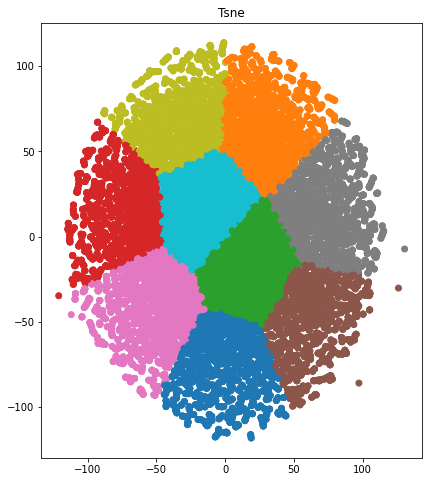

In [36]:
km_neat = KMeans(n_clusters=9, random_state=42).fit_predict(tsne)
cmap = 'tab10'
plt.figure(figsize=(15,8))
plt.subplot(121, title='Tsne')
plt.scatter(tsne[:,0], tsne[:,1], c=km_neat, cmap=cmap)

In [37]:
df_percent['Cluster'] = cluster1
df_percent['Player'] = dataset['Player']
df_percent['Pos'] = dataset['Pos']
df_percent['Year']=dataset['Year']

In [38]:
px.scatter(df_percent, x='PTS', y='eFG%',color='Cluster',hover_data=['Player'])

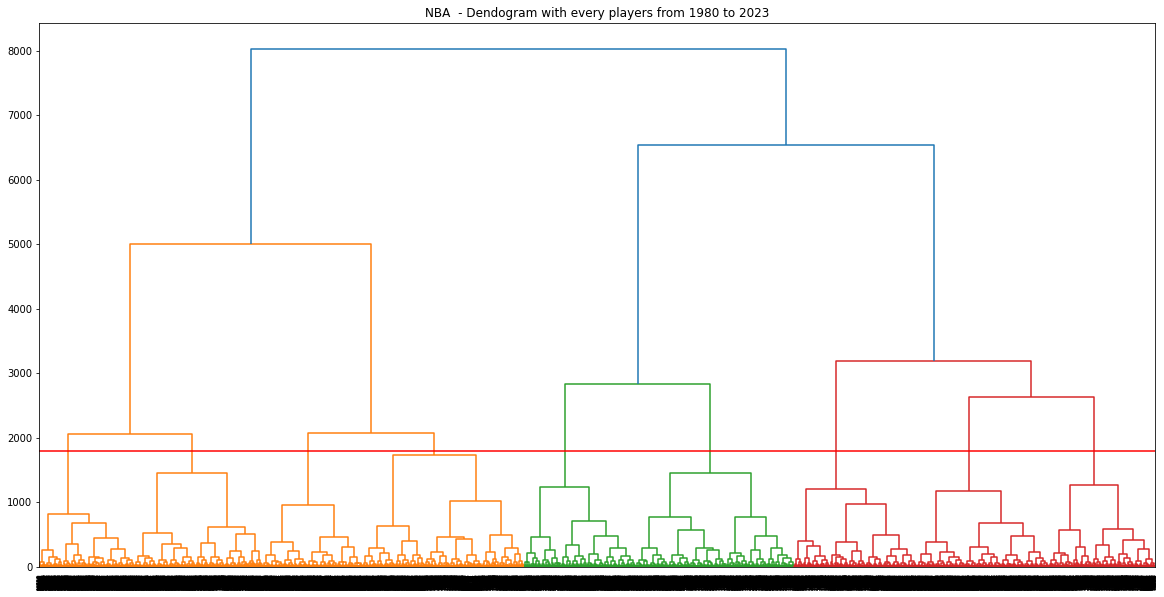

In [39]:
plt.figure(figsize=(20, 10))
plt.title("NBA  - Dendogram with every players from 1980 to 2023")
clusters = shc.linkage(tsne, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 1800, color = 'r', linestyle = '-')

In [50]:
cluster_ = df_percent.loc[df_percent['Cluster'] == 8].sort_values(['PTS','AST','TRB'], ascending=[False, False,False])
cluster_[['Player','Year','Pos','MP','PTS','AST','TRB','BLK','STL','eFG%','Cluster']].head(30)

Player  Year Pos    MP   PTS  AST  TRB  BLK  STL  eFG%  \
16       Otis Birdsong  1985  SG  32.9  20.6  4.1  2.6  0.1  1.5  51.8   
154        Joel Embiid  2017   C  25.4  20.2  2.1  7.8  2.5  0.9  49.5   
458     Antoine Walker  2003  PF  41.5  20.1  4.8  7.2  0.4  1.5  42.7   
435       Chris Webber  1995  PF  38.3  20.1  4.7  9.6  1.6  1.5  53.5   
357       Gus Williams  1985  PG  37.5  20.0  7.7  2.5  0.4  2.3  44.9   
41          RJ Barrett  2022  SF  34.5  20.0  3.0  5.8  0.2  0.6  44.2   
16       Otis Birdsong  1984  SG  31.4  19.8  3.9  2.5  0.2  1.2  51.3   
177         Ron Harper  1991  SG  35.5  19.6  5.4  4.8  0.9  1.7  40.8   
555     Antoine Walker  2005  PF  38.4  19.1  3.4  9.0  0.8  1.2  45.5   
389       Caris LeVert  2020  SG  29.6  18.7  4.4  4.2  0.2  1.2  45.1   
479     Antoine Walker  1999  PF  36.9  18.7  3.1  8.5  0.7  1.5  42.6   
171       Derek Harper  1993  SG  34.0  18.2  5.4  2.0  0.3  1.3  42.8   
122        Baron Davis  2002  PG  40.5  18.1  8.5  4.3  0.6  2.1  45.1   
704     Andrew Wiggins  2019  SF  34.8  18.1  2.5  4.8  0.7  1.0  44.1   
125        Baron Davis  2006  PG  36.5  17.9  8.9  4.4  0.3  1.6  43.4   
446  Dominique Wilkins  1995  SF  31.5  17.8  2.2  5.2  0.2  0.8  43.6   
255         Shawn Kemp  2000   C  30.4  17.8  1.7  8.8  1.2  1.2  41.8   
289    Stephon Marbury  1998  PG  38.0  17.7  8.6  2.8  0.1  1.3  44.8   
409       Isiah Thomas  1993  PG  37.0  17.6  8.5  2.9  0.2  1.6  43.9   
72         Kobe Bryant  2016  SF  28.2  17.6  2.8  3.7  0.2  0.9  41.0   
494         Josh Smith  2013  PF  35.3  17.5  4.2  8.4  1.8  1.2  49.8   
64         Rex Chapman  1990  SG  32.6  17.5  2.4  3.3  0.1  0.9  42.2   
811     Andrew Wiggins  2022  SF  31.9  17.2  2.2  4.5  0.7  1.0  51.3   
282     Antawn Jamison  2012  PF  33.1  17.2  2.0  6.3  0.7  0.8  42.5   
337    Pooh Richardson  1991  PG  38.5  17.1  9.0  3.5  0.2  1.6  48.5   
110        Baron Davis  2003  PG  37.8  17.1  6.4  3.7  0.4  1.8  45.2   
133        Mike Conley  2018  PG  31.1  17.1  4.1  2.3  0.3  1.0  44.0   
59        Bradley Beal  2014  SG  34.7  17.1  3.3  3.7  0.2  1.0  42.6   
386       Mike Woodson  1987  SG  28.7  17.1  2.6  2.2  0.2  1.4  45.7   
644     Andrew Wiggins  2023  SF  32.2  17.1  2.3  5.0  0.8  1.2  53.0   

     Cluster  
16         8  
154        8  
458        8  
435        8  
357        8  
41         8  
16         8  
177        8  
555        8  
389        8  
479        8  
171        8  
122        8  
704        8  
125        8  
446        8  
255        8  
289        8  
409        8  
72         8  
494        8  
64         8  
811        8  
282        8  
337        8  
110        8  
133        8  
59         8  
386        8  
644        8

In [59]:
df_percent.to_csv('All_Data.csv')

In [2]:
df5 = pd.read_csv('All_Data.csv',index_col=0)
df5

Player  Year Pos    MP   FG%   3P%   2P%  eFG%   FT%  ORB  \
0    Kareem Abdul-Jabbar  1980   C  38.3  60.4   0.0  60.4  60.4  76.5  2.3   
1          Tom Abernethy  1980  PF  18.2  48.1   0.0  48.3  48.3  68.3  0.9   
2            Alvan Adams  1980   C  28.9  53.1   0.0  53.3  53.3  79.7  2.1   
3         Tiny Archibald  1980  PG  35.8  48.2  22.2  48.8  48.8  83.0  0.7   
4          Dennis Awtrey  1980   C  21.5  45.0   0.0  45.0  45.0  64.0  1.1   
..                   ...   ...  ..   ...   ...   ...   ...   ...   ...  ...   
664   McKinley Wright IV  2023  PG  10.3  46.9  28.6  54.3  54.3  63.6  0.3   
665       Thaddeus Young  2023  PF  14.9  54.5  17.6  62.2  62.2  69.2  1.3   
666           Trae Young  2023  PG  35.1  43.2  32.9  48.3  48.3  88.6  0.8   
667          Cody Zeller  2023   C  14.5  65.2   0.0  65.2  65.2  71.4  1.5   
668          Ivica Zubac  2023   C  29.1  62.4   0.0  62.7  62.7  70.4  3.3   

     ...  Pos_SF  Pos_SF-C  Pos_SF-PF  Pos_SF-SG  Pos_SG  Pos_SG-PF  \
0    ...       0         0          0          0       0          0   
1    ...       0         0          0          0       0          0   
2    ...       0         0          0          0       0          0   
3    ...       0         0          0          0       0          0   
4    ...       0         0          0          0       0          0   
..   ...     ...       ...        ...        ...     ...        ...   
664  ...       0         0          0          0       0          0   
665  ...       0         0          0          0       0          0   
666  ...       0         0          0          0       0          0   
667  ...       0         0          0          0       0          0   
668  ...       0         0          0          0       0          0   

     Pos_SG-PG  Pos_SG-PG-SF  Pos_SG-SF  Cluster  
0            0             0          0        6  
1            0             0          0        4  
2            0             0          0        4  
3            0             0          0        7  
4            0             0          0        4  
..         ...           ...        ...      ...  
664          0             0          0        2  
665          0             0          0        2  
666          0             0          0        7  
667          0             0          0        1  
668          0             0          0        6  

[18780 rows x 36 columns]

In [4]:
df5 = df5.loc[df5['eFG%'] != 100]
df5 = df5.loc[df5['Year'] != 2023]

In [5]:
df5

Player  Year Pos    MP   FG%   3P%   2P%  eFG%   FT%  ORB  \
0    Kareem Abdul-Jabbar  1980   C  38.3  60.4   0.0  60.4  60.4  76.5  2.3   
1          Tom Abernethy  1980  PF  18.2  48.1   0.0  48.3  48.3  68.3  0.9   
2            Alvan Adams  1980   C  28.9  53.1   0.0  53.3  53.3  79.7  2.1   
3         Tiny Archibald  1980  PG  35.8  48.2  22.2  48.8  48.8  83.0  0.7   
4          Dennis Awtrey  1980   C  21.5  45.0   0.0  45.0  45.0  64.0  1.1   
..                   ...   ...  ..   ...   ...   ...   ...   ...   ...  ...   
835       Thaddeus Young  2022  PF  16.3  51.8  35.4  55.4  55.4  46.9  1.5   
838           Trae Young  2022  PG  34.9  46.0  38.2  51.2  51.2  90.4  0.7   
839       Omer Yurtseven  2022   C  12.6  52.6   9.1  54.7  54.7  62.3  1.5   
840          Cody Zeller  2022   C  13.1  56.7   0.0  59.3  59.3  77.6  1.9   
841          Ivica Zubac  2022   C  24.4  62.6   0.0  62.6  62.6  72.7  2.9   

     ...  Pos_SF  Pos_SF-C  Pos_SF-PF  Pos_SF-SG  Pos_SG  Pos_SG-PF  \
0    ...       0         0          0          0       0          0   
1    ...       0         0          0          0       0          0   
2    ...       0         0          0          0       0          0   
3    ...       0         0          0          0       0          0   
4    ...       0         0          0          0       0          0   
..   ...     ...       ...        ...        ...     ...        ...   
835  ...       0         0          0          0       0          0   
838  ...       0         0          0          0       0          0   
839  ...       0         0          0          0       0          0   
840  ...       0         0          0          0       0          0   
841  ...       0         0          0          0       0          0   

     Pos_SG-PG  Pos_SG-PG-SF  Pos_SG-SF  Cluster  
0            0             0          0        6  
1            0             0          0        4  
2            0             0          0        4  
3            0             0          0        7  
4            0             0          0        4  
..         ...           ...        ...      ...  
835          0             0          0        2  
838          0             0          0        1  
839          0             0          0        3  
840          0             0          0        7  
841          0             0          0        6  

[18188 rows x 36 columns]

In [8]:
df5 = df5.drop(['Pos_C',
       'Pos_C-PF', 'Pos_PF', 'Pos_PF-C', 'Pos_PF-SF', 'Pos_PG', 'Pos_PG-SF',
       'Pos_PG-SG', 'Pos_SF', 'Pos_SF-C', 'Pos_SF-PF', 'Pos_SF-SG', 'Pos_SG',
       'Pos_SG-PF', 'Pos_SG-PG', 'Pos_SG-PG-SF', 'Pos_SG-SF'], axis=1)

In [9]:
df5.columns

Index(['Player', 'Year', 'Pos', 'MP', 'FG%', '3P%', '2P%', 'eFG%', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Cluster'],
      dtype='object')

In [10]:
df5 = df5.drop(['Cluster'], axis=1)

In [11]:
df5

Player  Year Pos    MP   FG%   3P%   2P%  eFG%   FT%  ORB  \
0    Kareem Abdul-Jabbar  1980   C  38.3  60.4   0.0  60.4  60.4  76.5  2.3   
1          Tom Abernethy  1980  PF  18.2  48.1   0.0  48.3  48.3  68.3  0.9   
2            Alvan Adams  1980   C  28.9  53.1   0.0  53.3  53.3  79.7  2.1   
3         Tiny Archibald  1980  PG  35.8  48.2  22.2  48.8  48.8  83.0  0.7   
4          Dennis Awtrey  1980   C  21.5  45.0   0.0  45.0  45.0  64.0  1.1   
..                   ...   ...  ..   ...   ...   ...   ...   ...   ...  ...   
835       Thaddeus Young  2022  PF  16.3  51.8  35.4  55.4  55.4  46.9  1.5   
838           Trae Young  2022  PG  34.9  46.0  38.2  51.2  51.2  90.4  0.7   
839       Omer Yurtseven  2022   C  12.6  52.6   9.1  54.7  54.7  62.3  1.5   
840          Cody Zeller  2022   C  13.1  56.7   0.0  59.3  59.3  77.6  1.9   
841          Ivica Zubac  2022   C  24.4  62.6   0.0  62.6  62.6  72.7  2.9   

     DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0    8.5  10.8  4.5  1.0  3.4  3.6  2.6  24.8  
1    1.9   2.9  1.3  0.5  0.2  0.6  1.8   5.4  
2    6.0   8.1  4.3  1.4  0.7  2.9  3.2  14.9  
3    1.7   2.5  8.4  1.3  0.1  3.0  2.7  14.1  
4    3.3   4.4  1.5  0.5  0.6  1.0  2.5   3.3  
..   ...   ...  ...  ...  ...  ...  ...   ...  
835  2.5   4.0  2.0  1.0  0.3  1.0  1.6   6.2  
838  3.1   3.7  9.7  0.9  0.1  4.0  1.7  28.4  
839  3.7   5.3  0.9  0.3  0.4  0.7  1.5   5.3  
840  2.8   4.6  0.8  0.3  0.2  0.7  2.1   5.2  
841  5.6   8.5  1.6  0.5  1.0  1.5  2.7  10.3  

[18188 rows x 18 columns]

In [26]:
df5['Pos'] = df5['Pos'].replace(['SF-C','C-PF'], 'C')
df5['Pos'] = df5['Pos'].replace(['PF-SF','PF-C'], 'PF')
df5['Pos'] = df5['Pos'].replace(['SG-PG-SF','SG-PF','SG-SF'], 'SG')
df5['Pos'] = df5['Pos'].replace(['PG-SF','SF-PF','SF-SG'], 'SF')
df5['Pos'] = df5['Pos'].replace(['PG-SG','SG-PG'], 'PG')

In [28]:
df5['Pos'].value_counts(normalize=True)

PF    0.207719
C     0.203871
SG    0.203541
PG    0.194029
SF    0.190840
Name: Pos, dtype: float64

In [29]:
df5.to_csv('All_Data_cleaned.csv')

In [35]:
df_percent.columns

Index(['MP', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF',
       'Pos_SG', 'Cluster', 'Player'],
      dtype='object')

In [34]:
df_percent_.columns

Index(['Player', 'Year', 'MP', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Pos_C',
       'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG'],
      dtype='object')

In [32]:
df5 = pd.read_csv('All_Data_cleaned.csv',sep=',',index_col=0)
df5

Player  Year Pos    MP   FG%   3P%   2P%  eFG%   FT%  ORB  \
0    Kareem Abdul-Jabbar  1980   C  38.3  60.4   0.0  60.4  60.4  76.5  2.3   
1          Tom Abernethy  1980  PF  18.2  48.1   0.0  48.3  48.3  68.3  0.9   
2            Alvan Adams  1980   C  28.9  53.1   0.0  53.3  53.3  79.7  2.1   
3         Tiny Archibald  1980  PG  35.8  48.2  22.2  48.8  48.8  83.0  0.7   
4          Dennis Awtrey  1980   C  21.5  45.0   0.0  45.0  45.0  64.0  1.1   
..                   ...   ...  ..   ...   ...   ...   ...   ...   ...  ...   
835       Thaddeus Young  2022  PF  16.3  51.8  35.4  55.4  55.4  46.9  1.5   
838           Trae Young  2022  PG  34.9  46.0  38.2  51.2  51.2  90.4  0.7   
839       Omer Yurtseven  2022   C  12.6  52.6   9.1  54.7  54.7  62.3  1.5   
840          Cody Zeller  2022   C  13.1  56.7   0.0  59.3  59.3  77.6  1.9   
841          Ivica Zubac  2022   C  24.4  62.6   0.0  62.6  62.6  72.7  2.9   

     DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0    8.5  10.8  4.5  1.0  3.4  3.6  2.6  24.8  
1    1.9   2.9  1.3  0.5  0.2  0.6  1.8   5.4  
2    6.0   8.1  4.3  1.4  0.7  2.9  3.2  14.9  
3    1.7   2.5  8.4  1.3  0.1  3.0  2.7  14.1  
4    3.3   4.4  1.5  0.5  0.6  1.0  2.5   3.3  
..   ...   ...  ...  ...  ...  ...  ...   ...  
835  2.5   4.0  2.0  1.0  0.3  1.0  1.6   6.2  
838  3.1   3.7  9.7  0.9  0.1  4.0  1.7  28.4  
839  3.7   5.3  0.9  0.3  0.4  0.7  1.5   5.3  
840  2.8   4.6  0.8  0.3  0.2  0.7  2.1   5.2  
841  5.6   8.5  1.6  0.5  1.0  1.5  2.7  10.3  

[18188 rows x 18 columns]

In [33]:
df_percent_ = pd.get_dummies(df5, columns = ['Pos'])
df_percent_

Player  Year    MP   FG%   3P%   2P%  eFG%   FT%  ORB  DRB  \
0    Kareem Abdul-Jabbar  1980  38.3  60.4   0.0  60.4  60.4  76.5  2.3  8.5   
1          Tom Abernethy  1980  18.2  48.1   0.0  48.3  48.3  68.3  0.9  1.9   
2            Alvan Adams  1980  28.9  53.1   0.0  53.3  53.3  79.7  2.1  6.0   
3         Tiny Archibald  1980  35.8  48.2  22.2  48.8  48.8  83.0  0.7  1.7   
4          Dennis Awtrey  1980  21.5  45.0   0.0  45.0  45.0  64.0  1.1  3.3   
..                   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
835       Thaddeus Young  2022  16.3  51.8  35.4  55.4  55.4  46.9  1.5  2.5   
838           Trae Young  2022  34.9  46.0  38.2  51.2  51.2  90.4  0.7  3.1   
839       Omer Yurtseven  2022  12.6  52.6   9.1  54.7  54.7  62.3  1.5  3.7   
840          Cody Zeller  2022  13.1  56.7   0.0  59.3  59.3  77.6  1.9  2.8   
841          Ivica Zubac  2022  24.4  62.6   0.0  62.6  62.6  72.7  2.9  5.6   

     ...  STL  BLK  TOV   PF   PTS  Pos_C  Pos_PF  Pos_PG  Pos_SF  Pos_SG  
0    ...  1.0  3.4  3.6  2.6  24.8      1       0       0       0       0  
1    ...  0.5  0.2  0.6  1.8   5.4      0       1       0       0       0  
2    ...  1.4  0.7  2.9  3.2  14.9      1       0       0       0       0  
3    ...  1.3  0.1  3.0  2.7  14.1      0       0       1       0       0  
4    ...  0.5  0.6  1.0  2.5   3.3      1       0       0       0       0  
..   ...  ...  ...  ...  ...   ...    ...     ...     ...     ...     ...  
835  ...  1.0  0.3  1.0  1.6   6.2      0       1       0       0       0  
838  ...  0.9  0.1  4.0  1.7  28.4      0       0       1       0       0  
839  ...  0.3  0.4  0.7  1.5   5.3      1       0       0       0       0  
840  ...  0.3  0.2  0.7  2.1   5.2      1       0       0       0       0  
841  ...  0.5  1.0  1.5  2.7  10.3      1       0       0       0       0  

[18188 rows x 22 columns]

In [36]:
df_percent_all =df_percent_.drop(['Player','Year'],axis=1)

scaler1 = StandardScaler().fit(df_percent_all).transform(df_percent_all)

tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(df_percent_all)

In [42]:
pickled_model = pickle.load(open('modelo.pkl', 'rb'))
pickled_model.fit_predict(tsne)

/Users/anabeatrizmacedo/opt/anaconda3/envs/r-tutorial/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([3, 1, 3, ..., 0, 5, 8], dtype=int32)

In [43]:
cluster1 = pickled_model.labels_
centroids1 = pickled_model.cluster_centers_

In [44]:
score1 = silhouette_score(tsne, pickled_model.labels_, metric='euclidean') #percent
print(score1)

0.32530475


In [45]:
df_percent_all['Cluster'] = cluster1
df_percent_all['Player'] = df5['Player']
df_percent_all['Pos'] = df5['Pos']
df_percent_all['Year']=df5['Year']

In [46]:
df_percent_all

MP   FG%   3P%   2P%  eFG%   FT%  ORB  DRB   TRB  AST  ...   PTS  \
0    38.3  60.4   0.0  60.4  60.4  76.5  2.3  8.5  10.8  4.5  ...  24.8   
1    18.2  48.1   0.0  48.3  48.3  68.3  0.9  1.9   2.9  1.3  ...   5.4   
2    28.9  53.1   0.0  53.3  53.3  79.7  2.1  6.0   8.1  4.3  ...  14.9   
3    35.8  48.2  22.2  48.8  48.8  83.0  0.7  1.7   2.5  8.4  ...  14.1   
4    21.5  45.0   0.0  45.0  45.0  64.0  1.1  3.3   4.4  1.5  ...   3.3   
..    ...   ...   ...   ...   ...   ...  ...  ...   ...  ...  ...   ...   
835  16.3  51.8  35.4  55.4  55.4  46.9  1.5  2.5   4.0  2.0  ...   6.2   
838  34.9  46.0  38.2  51.2  51.2  90.4  0.7  3.1   3.7  9.7  ...  28.4   
839  12.6  52.6   9.1  54.7  54.7  62.3  1.5  3.7   5.3  0.9  ...   5.3   
840  13.1  56.7   0.0  59.3  59.3  77.6  1.9  2.8   4.6  0.8  ...   5.2   
841  24.4  62.6   0.0  62.6  62.6  72.7  2.9  5.6   8.5  1.6  ...  10.3   

     Pos_C  Pos_PF  Pos_PG  Pos_SF  Pos_SG  Cluster               Player  Pos  \
0        1       0       0       0       0        3  Kareem Abdul-Jabbar    C   
1        0       1       0       0       0        1        Tom Abernethy   PF   
2        1       0       0       0       0        3          Alvan Adams    C   
3        0       0       1       0       0        7       Tiny Archibald   PG   
4        1       0       0       0       0        1        Dennis Awtrey    C   
..     ...     ...     ...     ...     ...      ...                  ...  ...   
835      0       1       0       0       0        0       Thaddeus Young   PF   
838      0       0       1       0       0        7           Trae Young   PG   
839      1       0       0       0       0        0       Omer Yurtseven    C   
840      1       0       0       0       0        5          Cody Zeller    C   
841      1       0       0       0       0        8          Ivica Zubac    C   

     Year  
0    1980  
1    1980  
2    1980  
3    1980  
4    1980  
..    ...  
835  2022  
838  2022  
839  2022  
840  2022  
841  2022  

[18188 rows x 24 columns]

In [50]:
df_percent

MP   FG%   3P%   2P%  eFG%   FT%  ORB  DRB   TRB  AST  ...  TOV   PF  \
0    22.0  47.8  25.0  56.0  56.0  74.3  2.0  4.4   6.4  1.0  ...  1.2  1.9   
1    27.0  59.7   0.0  59.9  59.9  36.4  5.1  6.5  11.5  2.3  ...  1.9  2.3   
2    35.0  54.0  10.0  54.6  54.6  79.1  2.8  7.2  10.0  3.2  ...  2.7  2.9   
3    12.9  47.8  36.0  62.5  62.5  62.5  0.6  1.0   1.6  0.5  ...  0.3  1.3   
4    21.8  47.9  37.2  59.6  59.6  71.1  1.1  3.5   4.6  1.2  ...  0.7  2.0   
..    ...   ...   ...   ...   ...   ...  ...  ...   ...  ...  ...  ...  ...   
527  21.2  44.1  30.8  55.9  55.9  88.9  0.9  2.0   3.0  3.6  ...  0.8  1.2   
528   9.0  41.7  16.7  50.0  50.0  62.5  0.3  0.8   1.1  1.3  ...  0.6  1.0   
529  16.0  56.3  15.4  64.2  64.2  75.0  1.5  1.9   3.4  1.5  ...  0.8  1.8   
530  35.7  42.7  31.6  48.3  48.3  88.6  0.7  2.2   2.9  9.9  ...  4.1  1.5   
531  29.2  61.0   0.0  61.3  61.3  71.2  3.4  6.8  10.1  1.0  ...  1.8  3.0   

      PTS  Pos_C  Pos_PF  Pos_PG  Pos_SF  Pos_SG  Cluster              Player  
0    10.2      1       0       0       0       0        7    Precious Achiuwa  
1     8.6      1       0       0       0       0        1        Steven Adams  
2    21.4      1       0       0       0       0        7         Bam Adebayo  
3     3.9      0       0       0       0       1        8        Ochai Agbaji  
4     9.1      0       1       0       0       0        4        Santi Aldama  
..    ...    ...     ...     ...     ...     ...      ...                 ...  
527   6.6      0       0       1       0       0        5        Delon Wright  
528   1.7      0       0       1       0       0        8  McKinley Wright IV  
529   4.9      0       1       0       0       0        1      Thaddeus Young  
530  27.2      0       0       1       0       0        3          Trae Young  
531  10.1      1       0       0       0       0        1         Ivica Zubac  

[498 rows x 22 columns]

In [74]:
df_percent['Year']=2023
df_percent['Pos'] = df['Pos']
df_percent.drop('Name',axis=1)

MP   FG%   3P%   2P%  eFG%   FT%  ORB  DRB   TRB  AST  ...   PTS  \
0    22.0  47.8  25.0  56.0  56.0  74.3  2.0  4.4   6.4  1.0  ...  10.2   
1    27.0  59.7   0.0  59.9  59.9  36.4  5.1  6.5  11.5  2.3  ...   8.6   
2    35.0  54.0  10.0  54.6  54.6  79.1  2.8  7.2  10.0  3.2  ...  21.4   
3    12.9  47.8  36.0  62.5  62.5  62.5  0.6  1.0   1.6  0.5  ...   3.9   
4    21.8  47.9  37.2  59.6  59.6  71.1  1.1  3.5   4.6  1.2  ...   9.1   
..    ...   ...   ...   ...   ...   ...  ...  ...   ...  ...  ...   ...   
527  21.2  44.1  30.8  55.9  55.9  88.9  0.9  2.0   3.0  3.6  ...   6.6   
528   9.0  41.7  16.7  50.0  50.0  62.5  0.3  0.8   1.1  1.3  ...   1.7   
529  16.0  56.3  15.4  64.2  64.2  75.0  1.5  1.9   3.4  1.5  ...   4.9   
530  35.7  42.7  31.6  48.3  48.3  88.6  0.7  2.2   2.9  9.9  ...  27.2   
531  29.2  61.0   0.0  61.3  61.3  71.2  3.4  6.8  10.1  1.0  ...  10.1   

     Pos_C  Pos_PF  Pos_PG  Pos_SF  Pos_SG  Cluster              Player  Year  \
0        1       0       0       0       0        7    Precious Achiuwa  2023   
1        1       0       0       0       0        1        Steven Adams  2023   
2        1       0       0       0       0        7         Bam Adebayo  2023   
3        0       0       0       0       1        8        Ochai Agbaji  2023   
4        0       1       0       0       0        4        Santi Aldama  2023   
..     ...     ...     ...     ...     ...      ...                 ...   ...   
527      0       0       1       0       0        5        Delon Wright  2023   
528      0       0       1       0       0        8  McKinley Wright IV  2023   
529      0       1       0       0       0        1      Thaddeus Young  2023   
530      0       0       1       0       0        3          Trae Young  2023   
531      1       0       0       0       0        1         Ivica Zubac  2023   

     Pos  
0      C  
1      C  
2      C  
3     SG  
4     PF  
..   ...  
527   PG  
528   PG  
529   PF  
530   PG  
531    C  

[498 rows x 24 columns]

In [75]:
df_percent_all

MP   FG%   3P%   2P%  eFG%   FT%  ORB  DRB   TRB  AST  ...   PTS  \
0    38.3  60.4   0.0  60.4  60.4  76.5  2.3  8.5  10.8  4.5  ...  24.8   
1    18.2  48.1   0.0  48.3  48.3  68.3  0.9  1.9   2.9  1.3  ...   5.4   
2    28.9  53.1   0.0  53.3  53.3  79.7  2.1  6.0   8.1  4.3  ...  14.9   
3    35.8  48.2  22.2  48.8  48.8  83.0  0.7  1.7   2.5  8.4  ...  14.1   
4    21.5  45.0   0.0  45.0  45.0  64.0  1.1  3.3   4.4  1.5  ...   3.3   
..    ...   ...   ...   ...   ...   ...  ...  ...   ...  ...  ...   ...   
835  16.3  51.8  35.4  55.4  55.4  46.9  1.5  2.5   4.0  2.0  ...   6.2   
838  34.9  46.0  38.2  51.2  51.2  90.4  0.7  3.1   3.7  9.7  ...  28.4   
839  12.6  52.6   9.1  54.7  54.7  62.3  1.5  3.7   5.3  0.9  ...   5.3   
840  13.1  56.7   0.0  59.3  59.3  77.6  1.9  2.8   4.6  0.8  ...   5.2   
841  24.4  62.6   0.0  62.6  62.6  72.7  2.9  5.6   8.5  1.6  ...  10.3   

     Pos_C  Pos_PF  Pos_PG  Pos_SF  Pos_SG  Cluster               Player  Pos  \
0        1       0       0       0       0        3  Kareem Abdul-Jabbar    C   
1        0       1       0       0       0        1        Tom Abernethy   PF   
2        1       0       0       0       0        3          Alvan Adams    C   
3        0       0       1       0       0        7       Tiny Archibald   PG   
4        1       0       0       0       0        1        Dennis Awtrey    C   
..     ...     ...     ...     ...     ...      ...                  ...  ...   
835      0       1       0       0       0        0       Thaddeus Young   PF   
838      0       0       1       0       0        7           Trae Young   PG   
839      1       0       0       0       0        0       Omer Yurtseven    C   
840      1       0       0       0       0        5          Cody Zeller    C   
841      1       0       0       0       0        8          Ivica Zubac    C   

     Year  
0    1980  
1    1980  
2    1980  
3    1980  
4    1980  
..    ...  
835  2022  
838  2022  
839  2022  
840  2022  
841  2022  

[18188 rows x 24 columns]

In [76]:
df_final = pd.concat([df_percent, df_percent_all])
df_final

MP   FG%   3P%   2P%  eFG%   FT%  ORB  DRB   TRB  AST  ...  Pos_C  \
0    22.0  47.8  25.0  56.0  56.0  74.3  2.0  4.4   6.4  1.0  ...      1   
1    27.0  59.7   0.0  59.9  59.9  36.4  5.1  6.5  11.5  2.3  ...      1   
2    35.0  54.0  10.0  54.6  54.6  79.1  2.8  7.2  10.0  3.2  ...      1   
3    12.9  47.8  36.0  62.5  62.5  62.5  0.6  1.0   1.6  0.5  ...      0   
4    21.8  47.9  37.2  59.6  59.6  71.1  1.1  3.5   4.6  1.2  ...      0   
..    ...   ...   ...   ...   ...   ...  ...  ...   ...  ...  ...    ...   
835  16.3  51.8  35.4  55.4  55.4  46.9  1.5  2.5   4.0  2.0  ...      0   
838  34.9  46.0  38.2  51.2  51.2  90.4  0.7  3.1   3.7  9.7  ...      0   
839  12.6  52.6   9.1  54.7  54.7  62.3  1.5  3.7   5.3  0.9  ...      1   
840  13.1  56.7   0.0  59.3  59.3  77.6  1.9  2.8   4.6  0.8  ...      1   
841  24.4  62.6   0.0  62.6  62.6  72.7  2.9  5.6   8.5  1.6  ...      1   

     Pos_PF  Pos_PG  Pos_SF  Pos_SG  Cluster            Player  Year  Pos  \
0         0       0       0       0        7  Precious Achiuwa  2023    C   
1         0       0       0       0        1      Steven Adams  2023    C   
2         0       0       0       0        7       Bam Adebayo  2023    C   
3         0       0       0       1        8      Ochai Agbaji  2023   SG   
4         1       0       0       0        4      Santi Aldama  2023   PF   
..      ...     ...     ...     ...      ...               ...   ...  ...   
835       1       0       0       0        0    Thaddeus Young  2022   PF   
838       0       1       0       0        7        Trae Young  2022   PG   
839       0       0       0       0        0    Omer Yurtseven  2022    C   
840       0       0       0       0        5       Cody Zeller  2022    C   
841       0       0       0       0        8       Ivica Zubac  2022    C   

                  Name  
0    Offensive Big Men  
1            All Stars  
2            All Stars  
3              6th Men  
4        Bench Warmers  
..                 ...  
835                NaN  
838                NaN  
839                NaN  
840                NaN  
841                NaN  

[18686 rows x 25 columns]

In [77]:
df_final.to_csv('Final_DF.csv')

In [78]:
df_percent.to_csv('train.csv')

In [79]:
df_percent_all.to_csv('test.csv')

In [63]:
px.scatter(df_final, x='PTS', y='eFG%',color='Cluster',hover_data=['Player'])

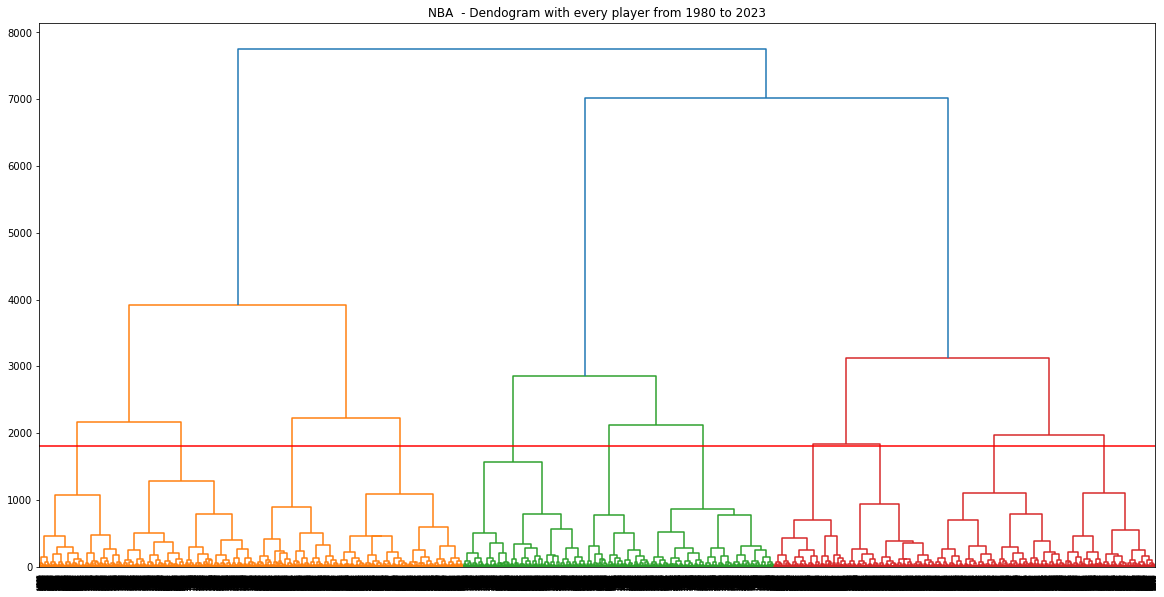

In [47]:
plt.figure(figsize=(20, 10))
plt.title("NBA  - Dendogram with every player from 1980 to 2023")
clusters = shc.linkage(tsne, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 1800, color = 'r', linestyle = '-')

In [68]:
df_name = pd.read_csv('Final_df.csv',sep=',',index_col=0)
#df_name = df_name.drop('Name',axis=1,inplace=True)

In [69]:
df7 = df_name.loc[df_name['Year'] == 2023]

In [82]:
cluster_ = df7.loc[df7['Cluster'] == 4].sort_values(['PTS','AST','TRB'], ascending=[False, False,False])
cluster_[['Player','Year','Pos','MP','PTS','AST','TRB','BLK','STL','eFG%','Cluster']].head(30)

Player  Year Pos    MP   PTS  AST  TRB  BLK  STL  eFG%  \
164       Aaron Gordon  2023  PF  30.1  16.8  2.6  6.8  0.8  0.8  63.4   
70       Thomas Bryant  2023   C  22.4  12.7  0.8  7.2  0.6  0.4  68.6   
384      Mason Plumlee  2023   C  28.2  12.2  3.6  9.7  0.6  0.6  67.4   
386       Jakob Poeltl  2023   C  25.9  11.8  3.0  9.0  1.2  0.8  62.0   
310  Kenyon Martin Jr.  2023  SF  25.3  11.2  1.4  5.4  0.3  0.4  67.3   
48             Bol Bol  2023  PF  24.4  11.0  0.9  6.6  1.5  0.5  63.8   
410           Naz Reid  2023   C  17.6  10.1  0.9  4.7  0.9  0.6  66.8   
95        Zach Collins  2023   C  20.7   9.6  2.5  5.9  0.7  0.4  58.4   
377         Cedi Osman  2023  SF  21.4   9.3  1.5  2.3  0.1  0.5  61.7   
4         Santi Aldama  2023  PF  21.8   9.1  1.2  4.6  0.7  0.7  59.6   
481  Jarred Vanderbilt  2023  PF  24.4   8.5  2.8  7.9  0.3  1.0  60.4   
303       Terance Mann  2023  SG  22.8   8.5  2.1  3.7  0.3  0.5  59.0   
152     Daniel Gafford  2023   C  17.7   8.3  0.8  5.1  1.3  0.4  74.2   
412      Nick Richards  2023   C  17.0   8.1  0.5  5.6  0.9  0.2  62.4   
520    Robert Williams  2023   C  23.1   7.9  1.6  8.1  1.2  0.5  76.3   
352    Larry Nance Jr.  2023  PF  22.6   7.7  1.9  5.6  0.7  1.0  64.9   
175         Josh Green  2023  SG  22.3   7.7  1.4  2.4  0.1  0.9  67.1   
260     Walker Kessler  2023   C  20.2   7.7  0.8  7.3  2.0  0.3  71.5   
273       Anthony Lamb  2023  SF  19.6   7.4  1.7  3.3  0.3  0.5  70.3   
300         Trey Lyles  2023  PF  15.7   7.3  0.8  3.7  0.5  0.4  60.9   
416  Mitchell Robinson  2023   C  26.9   7.2  1.0  8.9  1.8  0.9  67.4   
22            Mo Bamba  2023   C  16.9   7.2  1.0  4.6  0.9  0.3  59.6   
518      Mark Williams  2023   C  14.1   7.2  0.3  5.2  0.9  0.8  63.6   
294       Kevon Looney  2023   C  23.3   6.8  2.7  8.6  0.5  0.5  64.1   
275       Jock Landale  2023   C  14.5   6.8  0.9  3.9  0.5  0.3  63.3   
151     Wenyen Gabriel  2023  PF  15.7   6.5  0.5  4.0  0.6  0.4  66.9   
263        Maxi Kleber  2023   C  25.6   6.2  1.0  3.5  1.0  0.3  69.2   
172     JaMychal Green  2023  PF  14.8   6.2  0.7  4.1  0.3  0.5  65.1   
173      Javonte Green  2023  SG  16.0   5.9  0.8  2.9  0.7  0.8  68.6   
247  Derrick Jones Jr.  2023  SF  15.5   5.9  0.7  2.7  0.7  0.4  61.7   

     Cluster  
164        4  
70         4  
384        4  
386        4  
310        4  
48         4  
410        4  
95         4  
377        4  
4          4  
481        4  
303        4  
152        4  
412        4  
520        4  
352        4  
175        4  
260        4  
273        4  
300        4  
416        4  
22         4  
518        4  
294        4  
275        4  
151        4  
263        4  
172        4  
173        4  
247        4

In [64]:
df_name = df_name.loc[df_name['Year'] != 2023]
cluster_ = df_name.loc[df_name['Cluster'] == 0].sort_values(['PTS','AST','TRB'], ascending=[False, False,False])
cluster_[['Player','Year','Pos','MP','PTS','AST','TRB','BLK','STL','eFG%','Cluster']].head(30)

Player  Year Pos    MP   PTS  AST  TRB  BLK  STL  eFG%  \
224      Allen Iverson  2000  SG  40.8  28.4  4.7  3.8  0.1  2.1  43.5   
216      Allen Iverson  2003  SG  42.5  27.6  5.5  4.2  0.2  2.7  44.0   
223      Allen Iverson  1999  SG  41.5  26.8  4.6  4.9  0.1  2.3  44.0   
257      Allen Iverson  2004  SG  42.5  26.4  6.8  3.7  0.1  2.4  40.8   
335      Tracy McGrady  2006  SF  37.1  24.4  4.8  6.5  0.9  1.3  43.4   
244      Allen Iverson  1997  PG  40.1  23.5  7.5  4.1  0.3  2.1  44.8   
522     Antoine Walker  2001  PF  41.9  23.4  5.5  8.9  0.6  1.7  43.9   
301     Jamal Mashburn  1996  SF  37.2  23.4  2.8  5.4  0.2  0.8  39.1   
135        Baron Davis  2004  PG  40.1  22.9  7.5  4.3  0.4  2.4  44.8   
17      Gilbert Arenas  2010  PG  36.5  22.6  7.2  4.2  0.3  1.3  43.7   
102      World B. Free  1985  SG  31.7  22.5  4.5  3.0  0.2  1.1  47.4   
82         Kobe Bryant  2015  SG  34.5  22.3  5.6  5.7  0.2  1.3  40.1   
488     Antoine Walker  2002  PF  42.0  22.1  5.0  8.8  0.5  1.5  42.5   
254       Larry Hughes  2005  SG  38.7  22.0  4.7  6.3  0.3  2.9  46.5   
371      Tracy McGrady  2008  SG  37.0  21.6  5.9  5.1  0.5  1.0  45.7   
419   Jerry Stackhouse  2003  SG  39.2  21.5  4.5  3.7  0.4  0.9  43.9   
328     David Thompson  1980  SG  31.8  21.5  3.2  4.5  1.0  1.0  47.2   
451   Jerry Stackhouse  2002  SF  35.3  21.4  5.3  4.1  0.5  1.0  43.0   
266       LeBron James  2004  SG  39.5  20.9  5.9  5.5  0.7  1.6  43.8   
332     Jamal Mashburn  2004  SF  38.4  20.8  2.5  6.2  0.3  0.7  41.4   
509   Jerry Stackhouse  1997  SG  39.1  20.7  3.1  4.2  0.8  1.1  44.6   
690          John Wall  2021  PG  32.2  20.6  6.9  3.2  0.8  1.1  44.9   
181  Spencer Dinwiddie  2020  PG  31.2  20.6  6.8  3.5  0.3  0.6  48.5   
114        Ricky Davis  2003  SG  39.6  20.6  5.5  4.9  0.5  1.6  41.7   
400   Latrell Sprewell  1995  SG  40.2  20.6  4.0  3.7  0.7  1.6  47.3   
363       Kevin Martin  2010  SG  35.5  20.6  2.4  3.6  0.1  1.0  45.3   
305     Jamal Mashburn  2001  SF  39.3  20.1  5.4  7.6  0.2  1.1  42.8   
193         Ron Harper  1994  SG  38.1  20.1  4.6  6.1  0.7  1.9  45.3   
163      DeMar DeRozan  2015  SG  35.0  20.1  3.5  4.6  0.2  1.2  42.6   
357       Gus Williams  1985  PG  37.5  20.0  7.7  2.5  0.4  2.3  44.9   

     Cluster  
224        0  
216        0  
223        0  
257        0  
335        0  
244        0  
522        0  
301        0  
135        0  
17         0  
102        0  
82         0  
488        0  
254        0  
371        0  
419        0  
328        0  
451        0  
266        0  
332        0  
509        0  
690        0  
181        0  
114        0  
400        0  
363        0  
305        0  
193        0  
163        0  
357        0

In [ ]:
#0 Rising star |
#1 Defensive big men |
#2 Benche warmer
#3 MVP contender / All stars |
#4 6thm man |
#5 Reserves
#6 role player |
#7 Key Player | 
#8 Offensive big men |

In [60]:
df_name['Role']=df_name['Cluster']
df_name

MP   FG%   3P%   2P%  eFG%   FT%  ORB  DRB   TRB  AST  ...  Pos_PF  \
0    22.0  47.8  25.0  56.0  56.0  74.3  2.0  4.4   6.4  1.0  ...       0   
1    27.0  59.7   0.0  59.9  59.9  36.4  5.1  6.5  11.5  2.3  ...       0   
2    35.0  54.0  10.0  54.6  54.6  79.1  2.8  7.2  10.0  3.2  ...       0   
3    12.9  47.8  36.0  62.5  62.5  62.5  0.6  1.0   1.6  0.5  ...       0   
4    21.8  47.9  37.2  59.6  59.6  71.1  1.1  3.5   4.6  1.2  ...       1   
..    ...   ...   ...   ...   ...   ...  ...  ...   ...  ...  ...     ...   
835  16.3  51.8  35.4  55.4  55.4  46.9  1.5  2.5   4.0  2.0  ...       1   
838  34.9  46.0  38.2  51.2  51.2  90.4  0.7  3.1   3.7  9.7  ...       0   
839  12.6  52.6   9.1  54.7  54.7  62.3  1.5  3.7   5.3  0.9  ...       0   
840  13.1  56.7   0.0  59.3  59.3  77.6  1.9  2.8   4.6  0.8  ...       0   
841  24.4  62.6   0.0  62.6  62.6  72.7  2.9  5.6   8.5  1.6  ...       0   

     Pos_PG  Pos_SF  Pos_SG  Cluster            Player  Year  Pos  \
0         0       0       0        7  Precious Achiuwa  2023    C   
1         0       0       0        1      Steven Adams  2023    C   
2         0       0       0        7       Bam Adebayo  2023    C   
3         0       0       1        8      Ochai Agbaji  2023   SG   
4         0       0       0        4      Santi Aldama  2023   PF   
..      ...     ...     ...      ...               ...   ...  ...   
835       0       0       0        0    Thaddeus Young  2022   PF   
838       1       0       0        7        Trae Young  2022   PG   
839       0       0       0        0    Omer Yurtseven  2022    C   
840       0       0       0        5       Cody Zeller  2022    C   
841       0       0       0        8       Ivica Zubac  2022    C   

                  Name  Role  
0    Offensive Big Men     7  
1            All Stars     1  
2            All Stars     7  
3              6th Men     8  
4        Bench Warmers     4  
..                 ...   ...  
835                NaN     0  
838                NaN     7  
839                NaN     0  
840                NaN     5  
841                NaN     8  

[18686 rows x 26 columns]

In [61]:
df_name['Role'] = df_name['Role'].replace([0], 'Rising Star')
df_name['Role'] = df_name['Role'].replace([1], 'Defensive Big Men')
df_name['Role'] = df_name['Role'].replace([2], 'Bench Warmer')
df_name['Role'] = df_name['Role'].replace([3], 'Do it All')
df_name['Role'] = df_name['Role'].replace([4], '6th Man')
df_name['Role'] = df_name['Role'].replace([5], 'Reserves')
df_name['Role'] = df_name['Role'].replace([6], 'Role PLayer')
df_name['Role'] = df_name['Role'].replace([7], 'Key Player')
df_name['Role'] = df_name['Role'].replace([8], 'Offensive Big Men')

In [62]:
df_name

MP   FG%   3P%   2P%  eFG%   FT%  ORB  DRB   TRB  AST  ...  Pos_PF  \
0    22.0  47.8  25.0  56.0  56.0  74.3  2.0  4.4   6.4  1.0  ...       0   
1    27.0  59.7   0.0  59.9  59.9  36.4  5.1  6.5  11.5  2.3  ...       0   
2    35.0  54.0  10.0  54.6  54.6  79.1  2.8  7.2  10.0  3.2  ...       0   
3    12.9  47.8  36.0  62.5  62.5  62.5  0.6  1.0   1.6  0.5  ...       0   
4    21.8  47.9  37.2  59.6  59.6  71.1  1.1  3.5   4.6  1.2  ...       1   
..    ...   ...   ...   ...   ...   ...  ...  ...   ...  ...  ...     ...   
835  16.3  51.8  35.4  55.4  55.4  46.9  1.5  2.5   4.0  2.0  ...       1   
838  34.9  46.0  38.2  51.2  51.2  90.4  0.7  3.1   3.7  9.7  ...       0   
839  12.6  52.6   9.1  54.7  54.7  62.3  1.5  3.7   5.3  0.9  ...       0   
840  13.1  56.7   0.0  59.3  59.3  77.6  1.9  2.8   4.6  0.8  ...       0   
841  24.4  62.6   0.0  62.6  62.6  72.7  2.9  5.6   8.5  1.6  ...       0   

     Pos_PG  Pos_SF  Pos_SG  Cluster            Player  Year  Pos  \
0         0       0       0        7  Precious Achiuwa  2023    C   
1         0       0       0        1      Steven Adams  2023    C   
2         0       0       0        7       Bam Adebayo  2023    C   
3         0       0       1        8      Ochai Agbaji  2023   SG   
4         0       0       0        4      Santi Aldama  2023   PF   
..      ...     ...     ...      ...               ...   ...  ...   
835       0       0       0        0    Thaddeus Young  2022   PF   
838       1       0       0        7        Trae Young  2022   PG   
839       0       0       0        0    Omer Yurtseven  2022    C   
840       0       0       0        5       Cody Zeller  2022    C   
841       0       0       0        8       Ivica Zubac  2022    C   

                  Name               Role  
0    Offensive Big Men         Key Player  
1            All Stars  Defensive Big Men  
2            All Stars         Key Player  
3              6th Men  Offensive Big Men  
4        Bench Warmers            6th Man  
..                 ...                ...  
835                NaN        Rising Star  
838                NaN         Key Player  
839                NaN        Rising Star  
840                NaN           Reserves  
841                NaN  Offensive Big Men  

[18686 rows x 26 columns]

In [63]:
df_name.to_csv('Roles_Data.csv')